### Objective

- Create a neural network with Keras.
- Create the training, testing, and validation data sets and train the network.

### Workflow

1. Using Keras, create a neural network that we can use to train.
  - Select the type of network (Sequential).
  - Select the number of layers (use Dense).
  - Determine the number of neurons.
  - Select the optimizer.
  - Select the loss function.
  - Select the metrics (Use at least MeanAbsoluteError, Accuracy, and MeanSquaredError).

2. Create the training and testing datasets.
  - Typically, training is either 70% or 80% of the total dataset.
3. Train the neural network against your training data and validate against your testing data.
4. Graph the results to validate that you are getting closer to your desired results.

In [31]:
Eimport numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(keras.__version__)

1.19.5
1.1.5
2.4.0
2.4.0


#### Importing Data

In [11]:
df = pd.read_csv("sample_data/Games-Calculated.csv",header=None)
df.columns=["date", "home", "home_score","away","away_score","home_score_average","home_defense_average","away_score_average","away_defense_average","score_diff"]
df

date                 home  ...  away_defense_average score_diff
0      2015-11-13               Hawaii  ...             87.000000         11
1      2015-11-13     Eastern Michigan  ...             70.000000         20
2      2015-11-13                 Yale  ...             70.000000         13
3      2015-11-13     Central Michigan  ...             89.000000          6
4      2015-11-13           Iowa State  ...             68.000000          6
...           ...                  ...  ...                   ...        ...
20155  2019-03-21  Charleston Southern  ...             70.666667          2
20156  2019-03-21     Louisiana-Monroe  ...             75.200000         10
20157  2019-03-21  Cal State Fullerton  ...             72.666667         -8
20158  2019-03-22        Southern Utah  ...             70.066667          7
20159  2019-03-22            Creighton  ...             78.214286         12

[20160 rows x 10 columns]

Generaing labels were 0 means away won and 1 means home won.

In [35]:
labels = [ 1 if x > 0 else 0 for x in df.score_diff]
df["labels"] = labels

Scale values for columns

In [32]:
scaler = MinMaxScaler((0,1))

In [33]:
df[["home_score_average","home_defense_average","away_score_average","away_defense_average"]] = scaler.fit_transform(df[["home_score_average","home_defense_average","away_score_average","away_defense_average"]])

Getting all the wanted fields and splitting by 70% for training and 30 for testing

In [38]:
df_temp = df[["home_score_average","home_defense_average","away_score_average","away_defense_average", "labels"]]

In [175]:
X_train,X_test,y_train,y_test = train_test_split(df_temp[["home_score_average","home_defense_average","away_score_average","away_defense_average"]],df.labels,test_size=0.3)

Building Model and checking the accuracy

In [182]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=254,
                    validation_data=(X_test, y_test))

Epoch 1/10
56/56 [==============================] - 1s 5ms/step - loss: 0.2293 - acc: 0.6184 - val_loss: 0.2062 - val_acc: 0.6526
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1999 - acc: 0.6765 - val_loss: 0.1840 - val_acc: 0.7037
Epoch 3/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1773 - acc: 0.7428 - val_loss: 0.1679 - val_acc: 0.7692
Epoch 4/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1637 - acc: 0.7644 - val_loss: 0.1609 - val_acc: 0.7697
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.1592 - acc: 0.7644 - val_loss: 0.1586 - val_acc: 0.7710
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1571 - acc: 0.7663 - val_loss: 0.1581 - val_acc: 0.7707
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.1596 - acc: 0.7634 - val_loss: 0.1608 - val_acc: 0.7670
Epoch 8/10
56/56 [==============================] - 0s 2ms/step - loss: 0.1575 - acc: 0.76

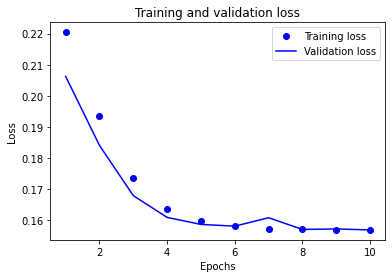

In [183]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, 10 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

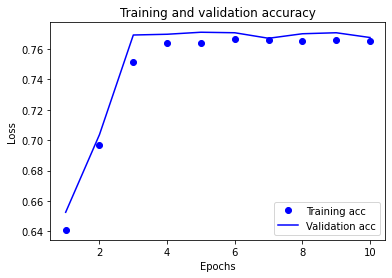

In [184]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Code End